#**Linear regression model training.**

In this notebook, a linear regression model is trained with information about the gross domestic product of each country and its relationship with the life satisfaction index.

**Step 1: Import libraries**

In [1]:
#Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
#import sys

**Step 2: Import data**

In [4]:
#Load data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
#gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',', delimiter='\t',
                             #encoding='latin1', na_values="n/a")

gdp_per_capita=pd.read_csv('gdp_per_capita.csv',thousands=',',delimiter='\t',
                           encoding='latin1',na_values="n/a")

**Step 3: Preprocessing**

In [5]:
# customized function
# Source: https://colab.research.google.com/github/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb#scrollTo=GgWecOhEaORT

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]


In [6]:
#Split attributes and labels
country_stats= prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [8]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


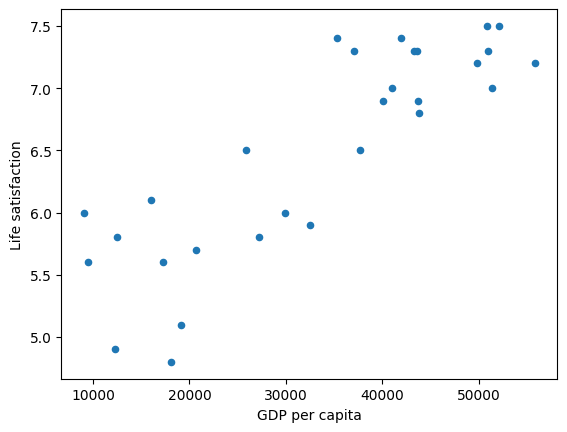

In [9]:
#Data visualization
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show()

**Step 4: Model selection, setup and training.**

In [10]:
#Seleccionar modelo lineal
model= sklearn.linear_model.LinearRegression()

In [11]:
# Entrenar modelo
# model.compile(metrics=['accuracy'])
model.fit(X, y)

LinearRegression()

**Step 5: Test the model.**

In [12]:
#Realizar predicciones
X_new = [[22587]] # GDP Chipré
print(model.predict(X_new))

[[5.96242338]]


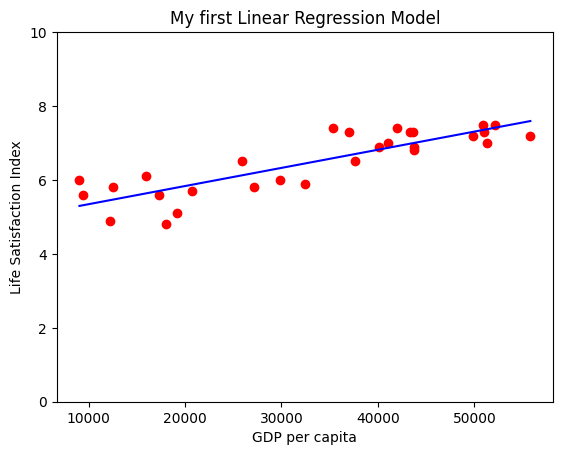

In [13]:
# Gráfica final con el modelo entrenado

plt.scatter(X, y, color='red')
plt.xlabel("GDP per capita")
plt.ylabel("Life Satisfaction Index")
plt.title("My first Linear Regression Model")
plt.ylim(0, 10)
plt.plot(X, model.predict(X), color='blue')

## Class: Artificial Intelligence

## MSc. Daniel Lopez

## References
1. Géron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.", Chapter 1.